In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv("/content/Salaries.csv")
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [ ]:
df.shape

(148654, 13)

In [ ]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [ ]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [ ]:
df.isnull().sum().sum()

334088

In [ ]:
df["TotalPay"].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [ ]:
TotalPay_range = df['TotalPay'].max() - df['TotalPay'].min()
TotalPay_range


568213.56

In [ ]:

df['JobTitle'] = df['JobTitle'].str.upper()

In [ ]:
df = df[df['JobTitle'] != "Not provided"]

In [ ]:

# Drop Notes, Status columns
df.drop(columns=['Notes', 'Status'], inplace=True)

In [ ]:
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [ ]:

null_basepay_rows = df[df['BasePay'].isnull()]

jobtitles_with_null_basepay = null_basepay_rows['JobTitle']

unique_jobtitles_with_null_basepay = jobtitles_with_null_basepay.unique()

filtered_df = df[df['JobTitle'].isin(unique_jobtitles_with_null_basepay)]

# Calculate the mean of 'BasePay' for each specific job title
mean_basepay_by_jobtitle = filtered_df.groupby('JobTitle')['BasePay'].mean()
# Replace the values in the original DataFrame with the calculated mean values
df.loc[df['JobTitle'].isin(unique_jobtitles_with_null_basepay), 'BasePay'] = df['JobTitle'].map(mean_basepay_by_jobtitle)

df['BasePay'].fillna(0, inplace=True)


In [ ]:
df['BasePay'].isnull().sum()

0

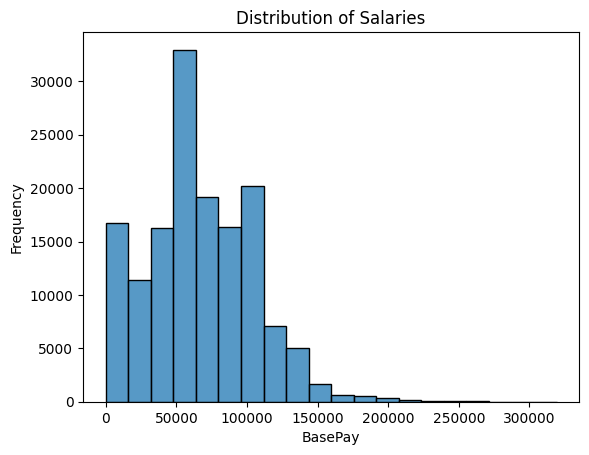

In [ ]:
# visualize the distribution of salaries
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['BasePay'], bins=20)
plt.title('Distribution of Salaries')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()

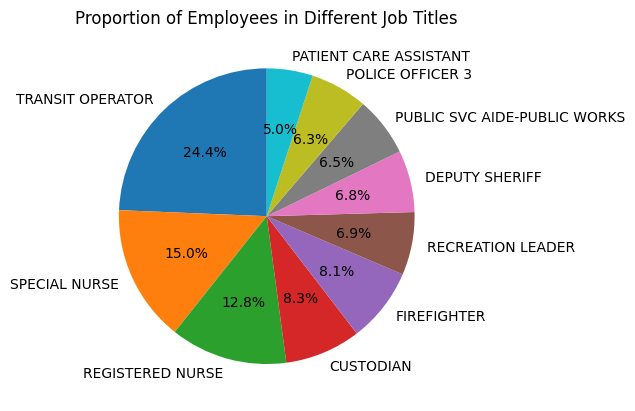

In [ ]:
# Pie chart
top_10_values = df['JobTitle'].value_counts().nlargest(10)

# Plot the pie chart
plt.pie(top_10_values, labels=top_10_values.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Job Titles')
plt.show()

In [ ]:
grouped_columns = [ 'Year','JobTitle']

# Calculate summary statistics for each group
grouped_data = df.groupby(grouped_columns)['TotalPay'].agg(['mean', 'count', 'min', 'max'])

# Display the grouped data
grouped_data

mean  count        min  \
Year JobTitle                                                          
2011 ACCOUNT CLERK                    44035.664337     83     614.00   
     ACCOUNTANT                       47429.268000      5    1148.40   
     ACCOUNTANT INTERN                29031.742917     48    2981.53   
     ACUPUNCTURIST                    67594.400000      1   67594.40   
     ADMINISTRATIVE ANALYST           63954.867527     93    2388.24   
...                                            ...    ...        ...   
2014 WIRE ROPE CABLE MAINT SPRV      190575.900000      1  190575.90   
     WORKER'S COMP SUPERVISOR 1       56689.446667      6      56.64   
     WORKER'S COMPENSATION ADJUSTER   70636.455385     26    1837.39   
     X-RAY LABORATORY AIDE            51211.566857     35   11341.85   
     YOUTH COMM ADVISOR               36465.910000      1   36465.91   

                                           max  
Year JobTitle                                   
2011 ACCOUNT CLERK                    60838.20  
     ACCOUNTANT                       65392.01  
     ACCOUNTANT INTERN                58799.53  
     ACUPUNCTURIST                    67594.40  
     ADMINISTRATIVE ANALYST           79754.03  
...                                        ...  
2014 WIRE ROPE CABLE MAINT SPRV      190575.90  
     WORKER'S COMP SUPERVISOR 1      108144.01  
     WORKER'S COMPENSATION ADJUSTER  106050.66  
     X-RAY LABORATORY AIDE            99812.97  
     YOUTH COMM ADVISOR               36465.91  

[4137 rows x 4 columns]

<ipython-input-32-e05aad0bccf8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


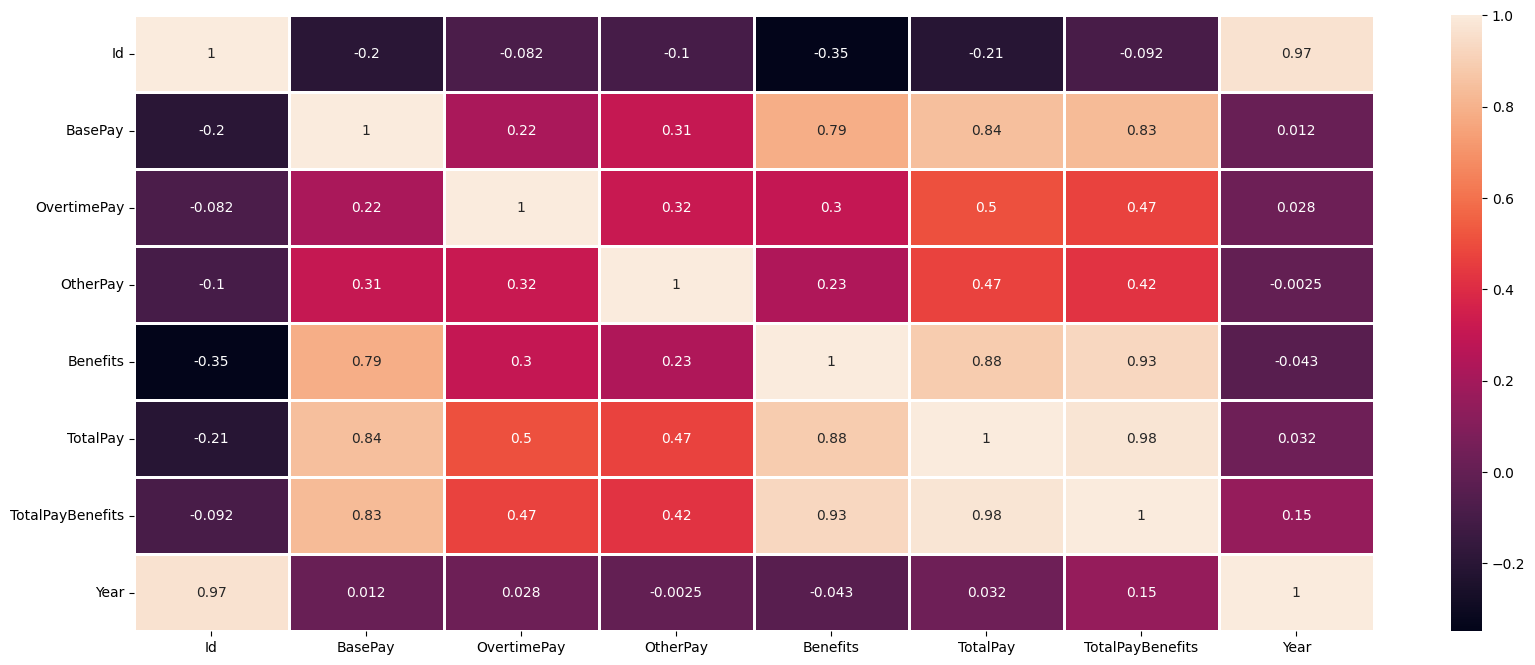

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(corr,annot=True,linewidth=1)

plt.show()

Correlation between 'TotalPay' and 'TotalPayBenefits': 0.9773128522072129


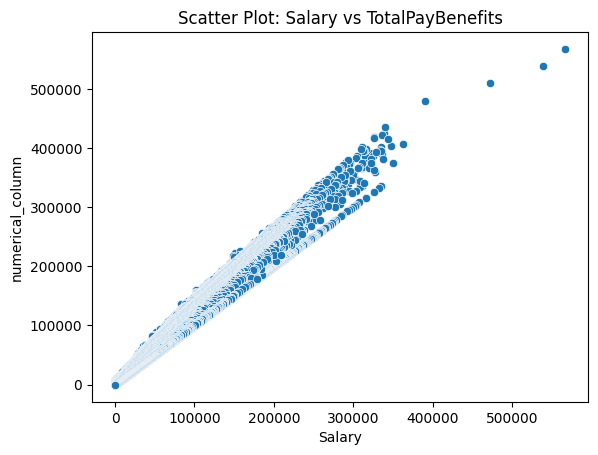

In [ ]:
correlation_coefficient = df['TotalPay'].corr(df['TotalPayBenefits'])

print(f"Correlation between 'TotalPay' and 'TotalPayBenefits':" ,correlation_coefficient)


sns.scatterplot(x='TotalPay', y='TotalPayBenefits', data=df)
plt.title(f'Scatter Plot: Salary vs TotalPayBenefits')
plt.xlabel('Salary')
plt.ylabel('numerical_column')
plt.show()


## In the beginning, the data was understood, and the relationship between them was discovered. For example, it was revealed that the 'TotalPay' column values are the sum of values from the columns 'BasePay,' 'OvertimePay,' and 'OtherPay.' Missing values were handled, such as calculating the mean of 'BasePay' for each specific job title. Two columns, 'Benefits' and 'Status,' were deleted. Visualization of the salary distribution was performed, revealing that the highest repeated salary of 30,000 equals 50,000. The first 10 job titles were displayed using a Pie chart, showing that the top three occupations were TRANSIT OPERATOR, SPECIAL NURSE, and REGISTERED NURSE.

## Subsequently, summary statistics were calculated for grouped columns ['Year', 'JobTitle'], and a heatmap was created to visualize the relationships between all columns. Finally, the correlation between 'TotalPay' and 'TotalPayBenefits' was computed